##  **Description of the Code**

This JupyterLab script visualizes the interaction between a **subpixel-precise circle** and a **pixel grid**. The purpose is to demonstrate how the circle's position, size, and subpixel offset affect the pixel coverage, which is relevant for **image processing** and **computer vision** applications.

---

###  **Key Features**

####  **Pixel Grid Plotting**
- Each pixel is represented as a **square** on a 2D grid.
- The color of each pixel is determined by how much of the circle it captures:
  -  **Green**: More than 50% of the circle is inside the pixel.
  -  **Yellow**: Less than 50% of the circle is inside the pixel.
  -  **White**: The pixel does not intersect with the circle.

---

####  **Subpixel Circle**
- A **circle** is drawn with a **diameter** of approximately 4.5 pixels.
- The circle is positioned with **subpixel offsets** for both the x and y coordinates, allowing for precise placement between pixel boundaries.
- The boundary of the circle is displayed as a **blue outline**.

---

####  **Randomized Examples**
- The script generates **100 random examples** of circles.
- Each circle has a diameter close to **4.5 pixels** (with slight variation) and random offsets ranging from **0.0 to 0.5** for both x and y coordinates.
- Each example is visualized in its own plot, showing the interaction of the subpixel circle with the pixel grid.

---

####  **Plot Customization**
- Each plot shows **axis ticks**, **grid lines**, and an **equal aspect ratio** to ensure pixels remain square.
- The **step size** for the grid can be customized (default is 1) to highlight the individual pixel boundaries.


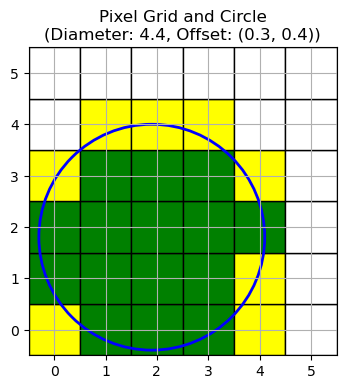

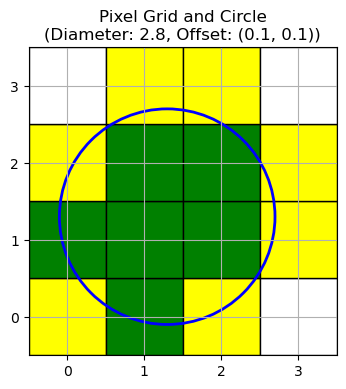

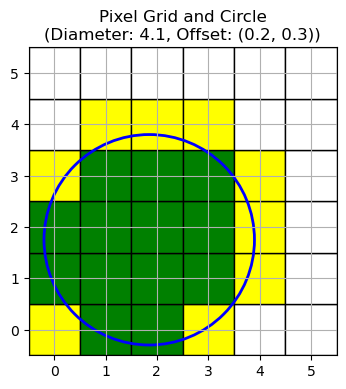

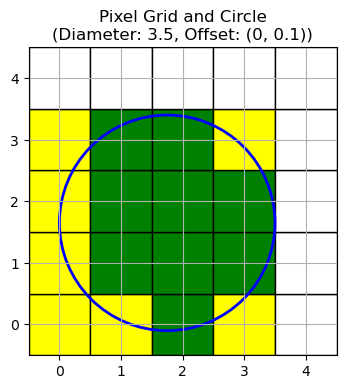

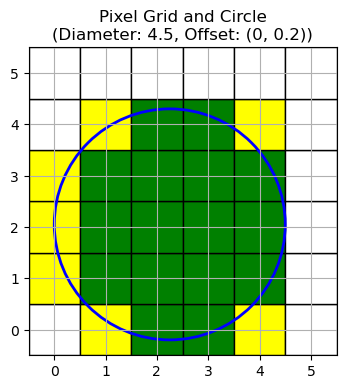

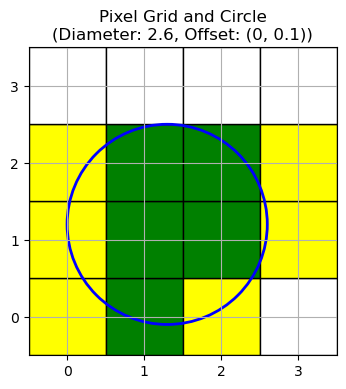

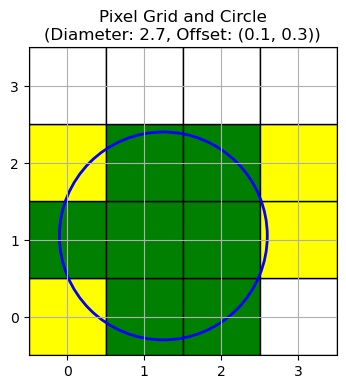

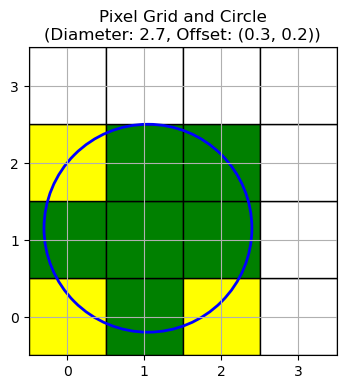

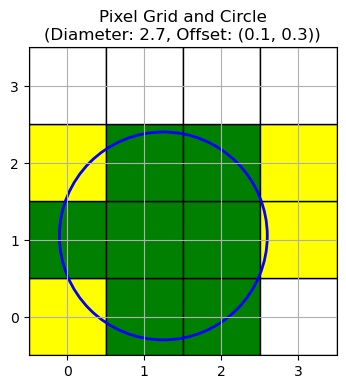

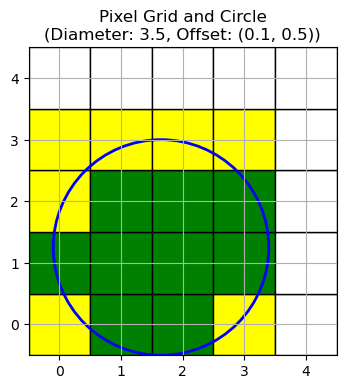

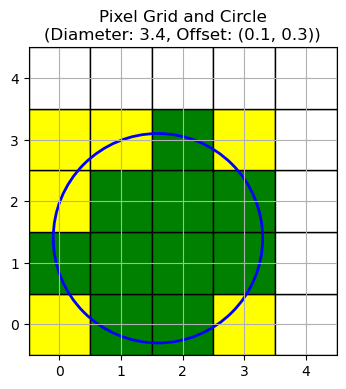

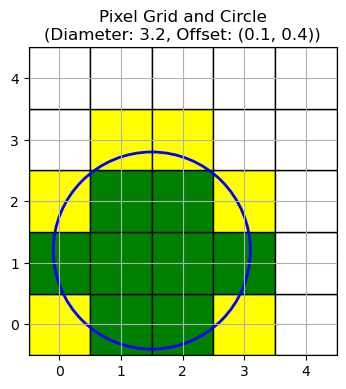

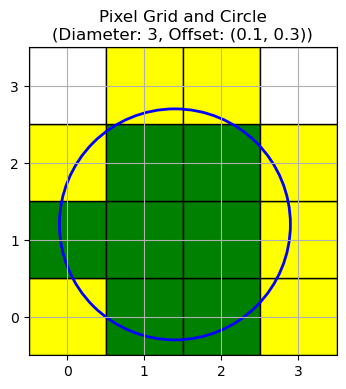

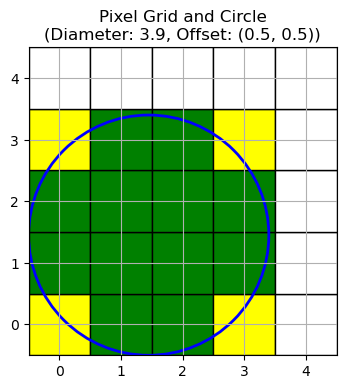

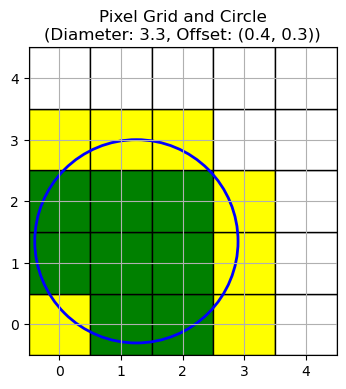

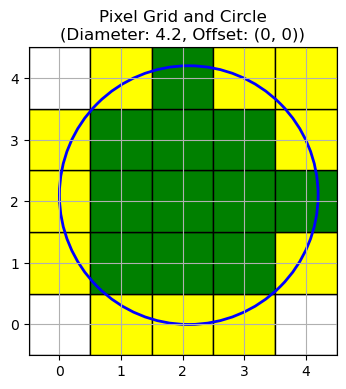

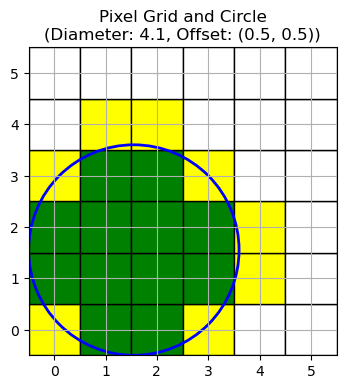

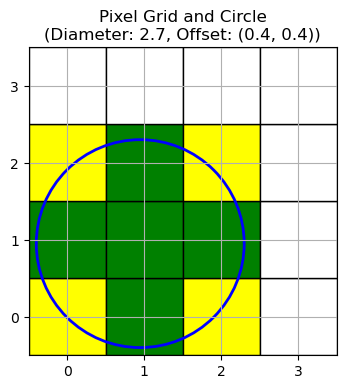

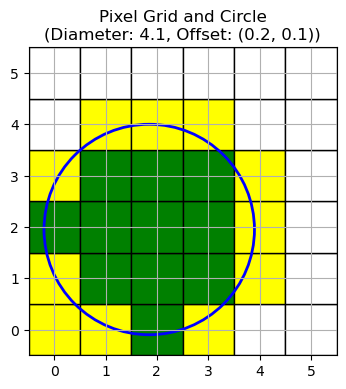

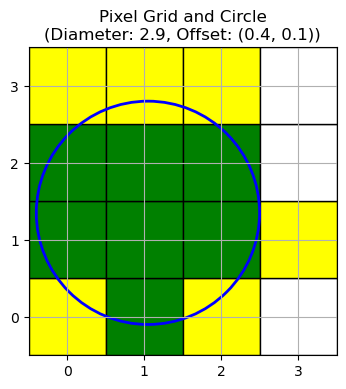

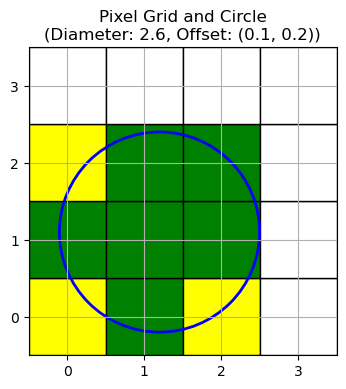

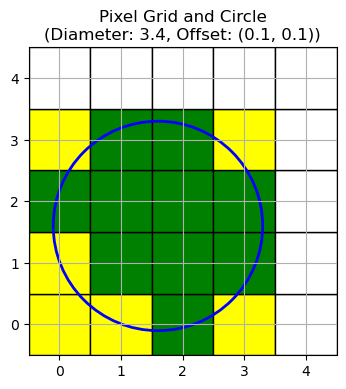

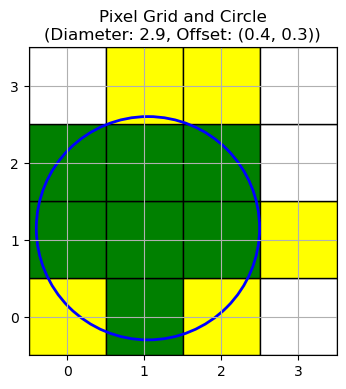

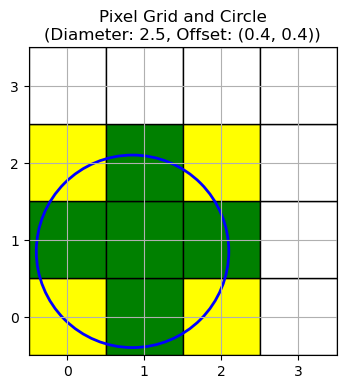

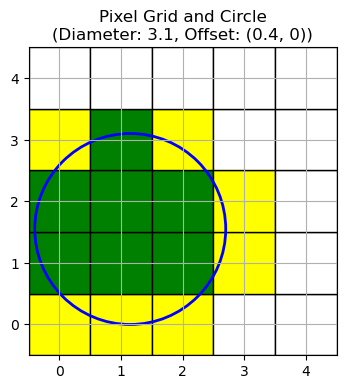

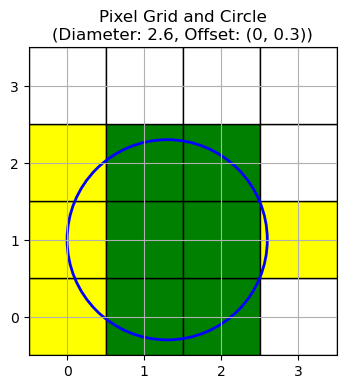

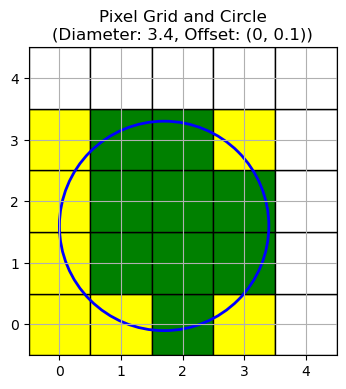

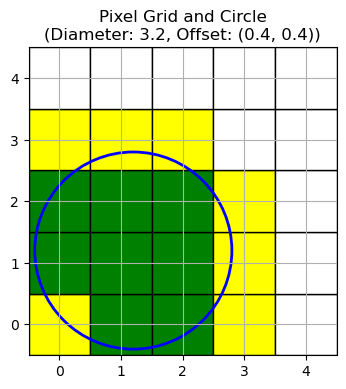

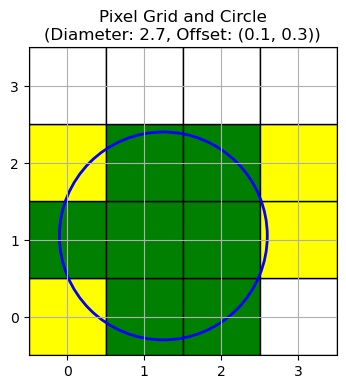

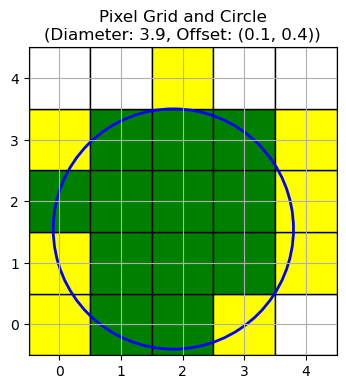

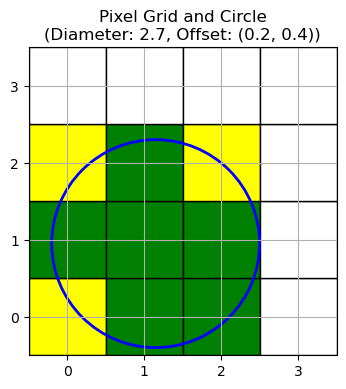

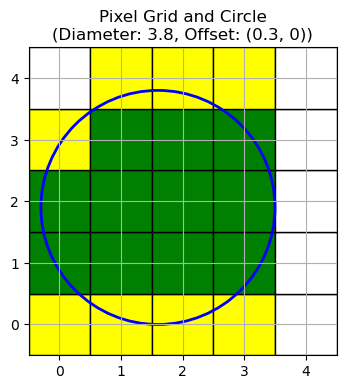

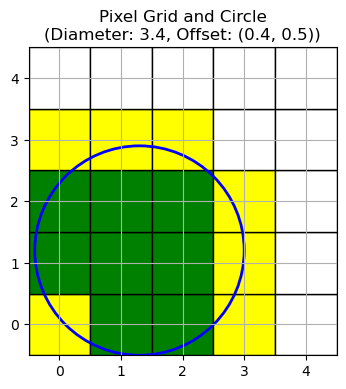

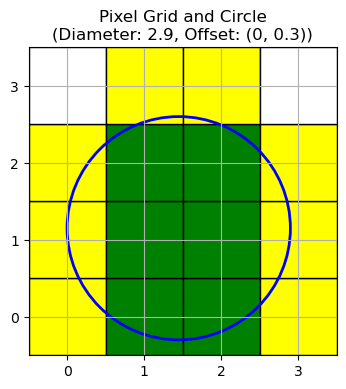

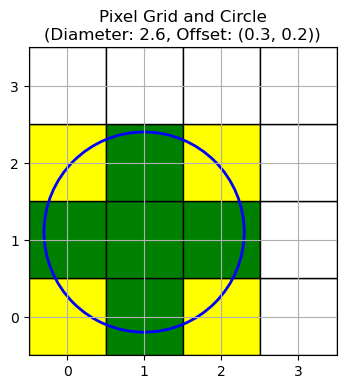

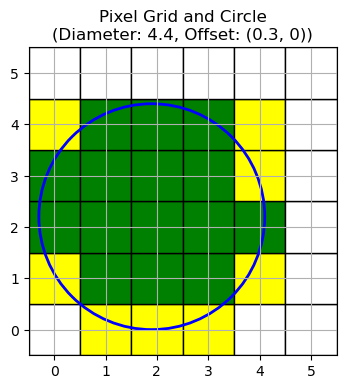

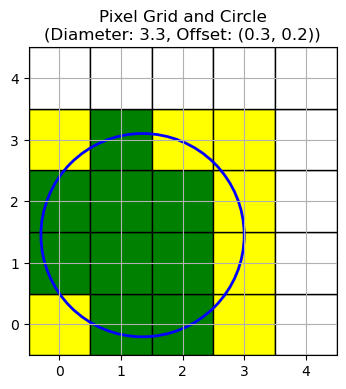

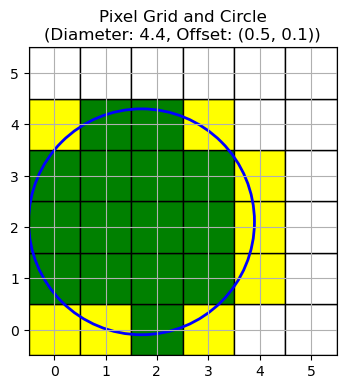

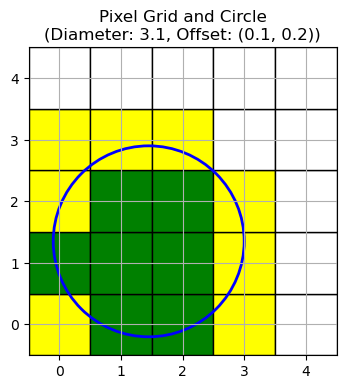

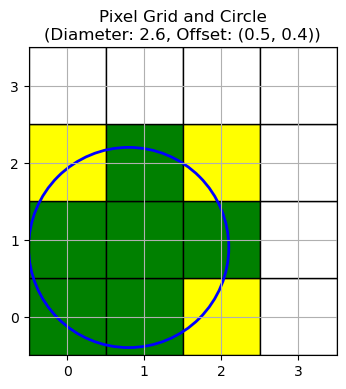

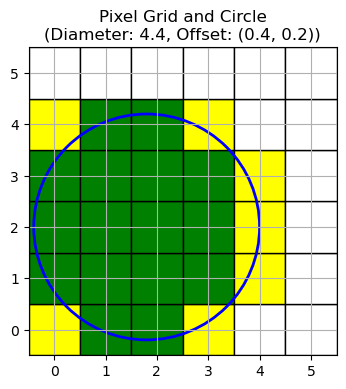

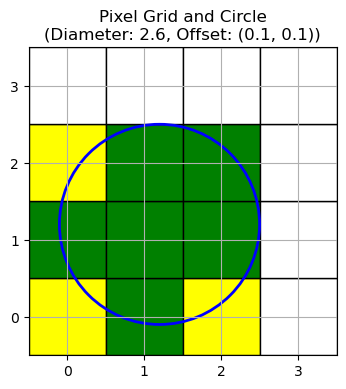

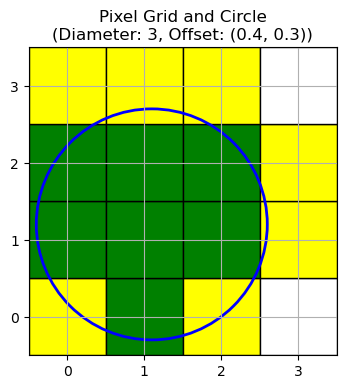

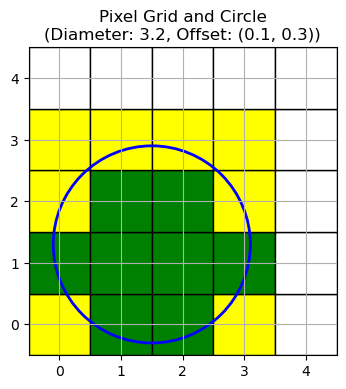

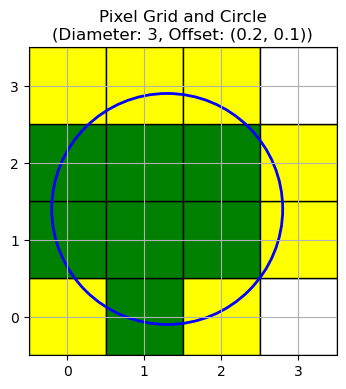

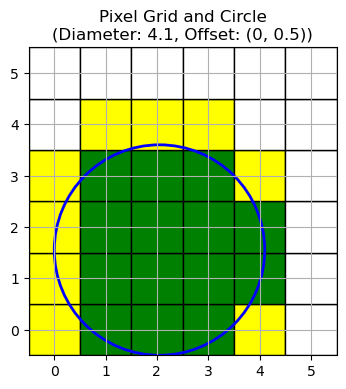

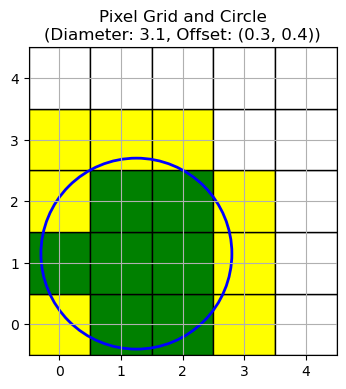

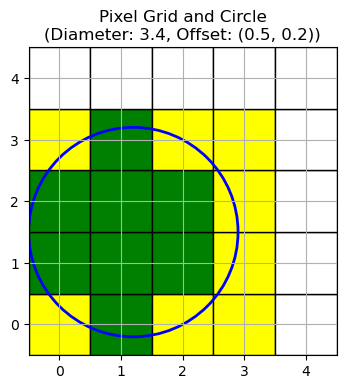

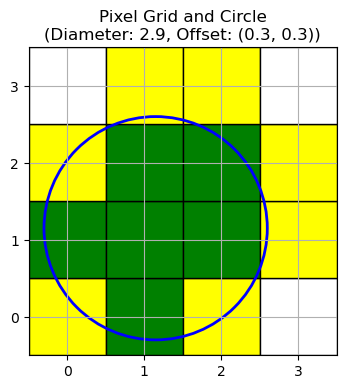

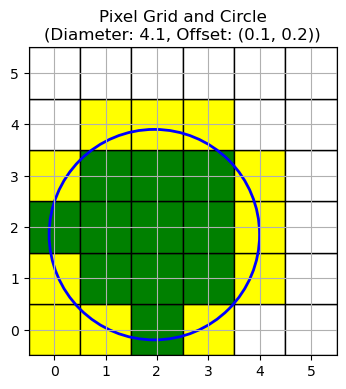

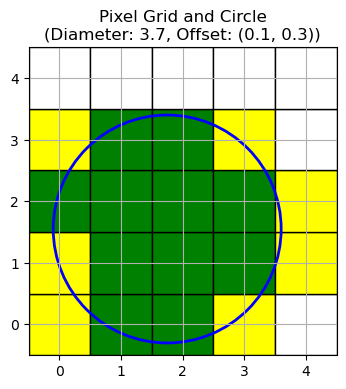

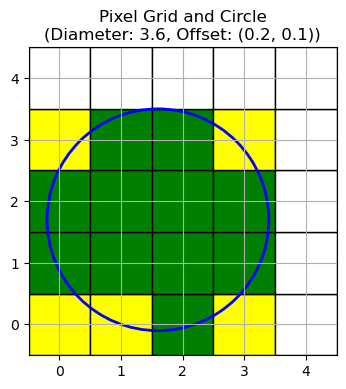

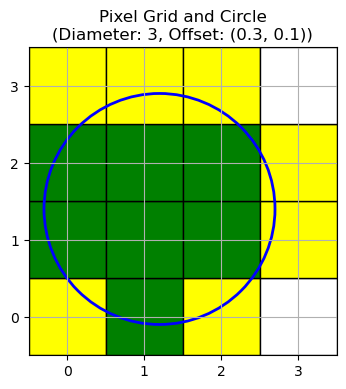

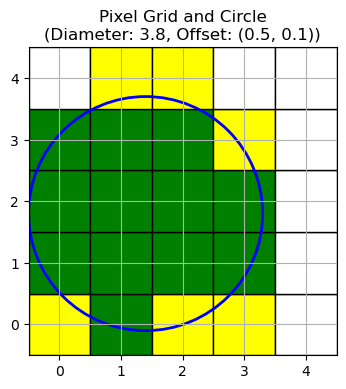

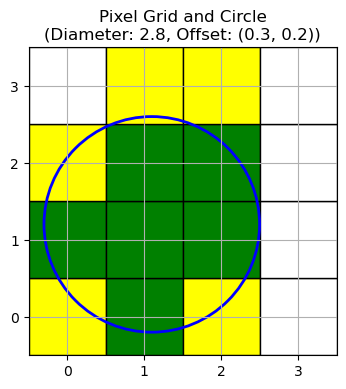

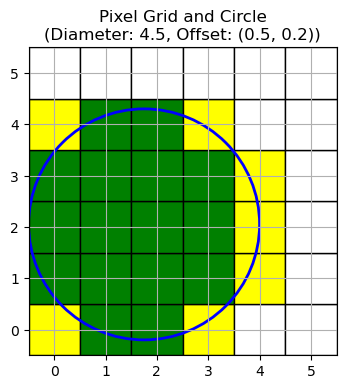

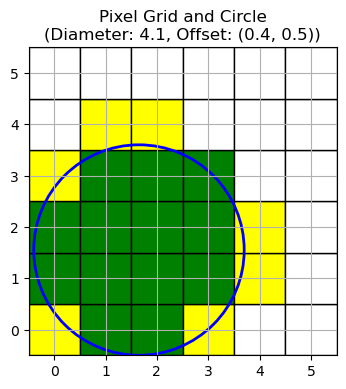

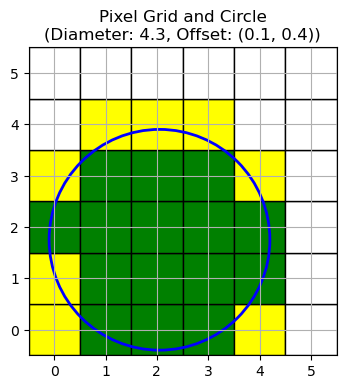

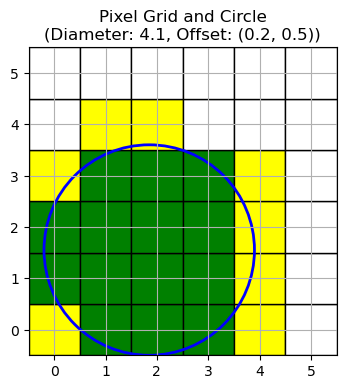

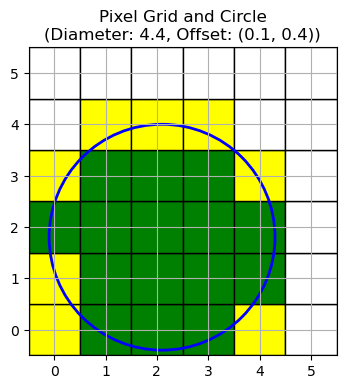

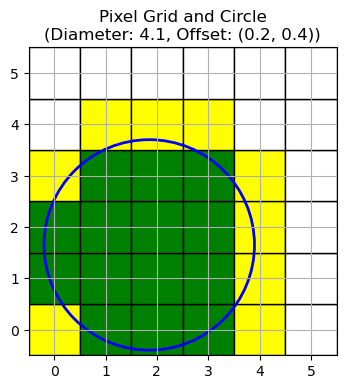

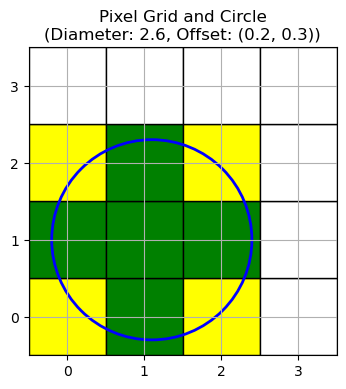

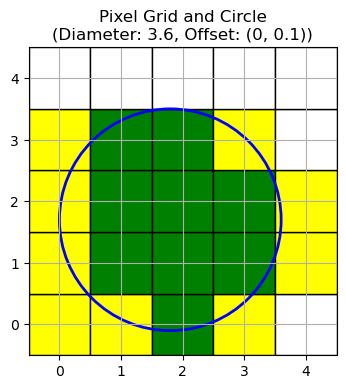

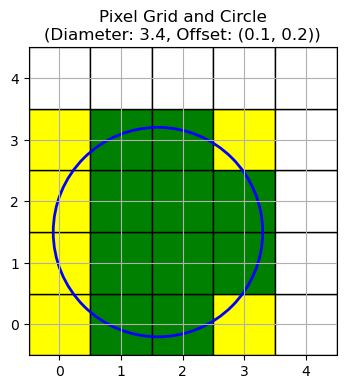

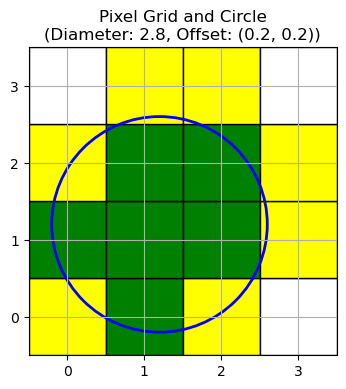

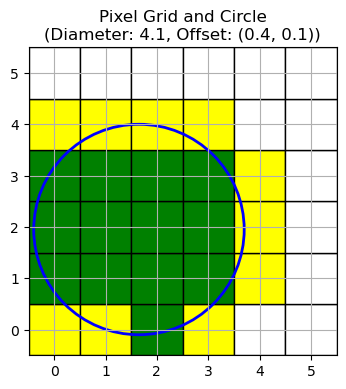

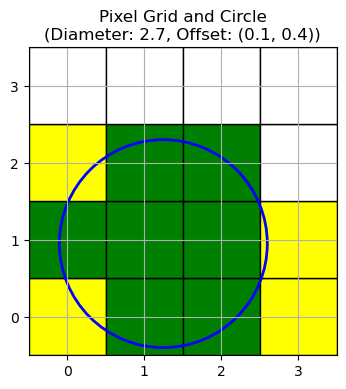

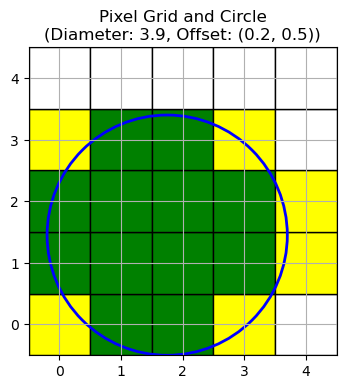

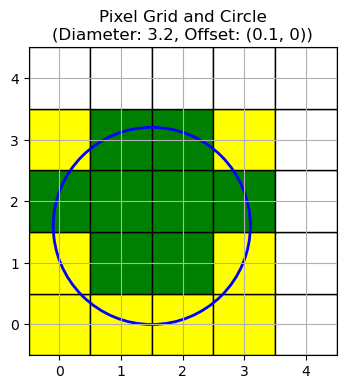

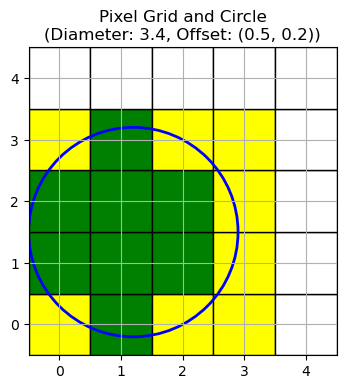

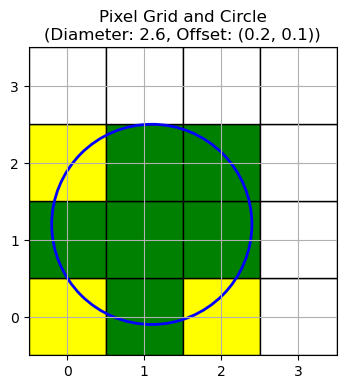

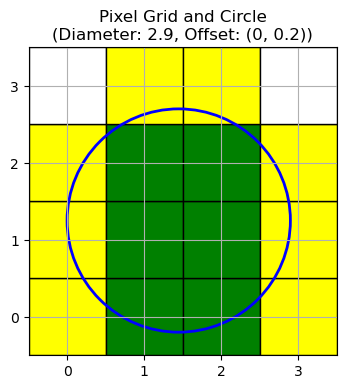

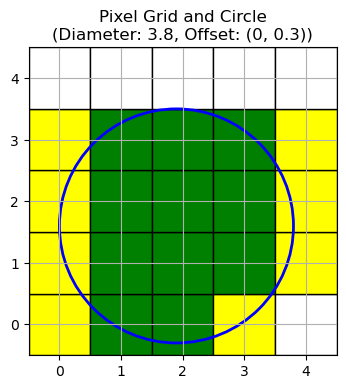

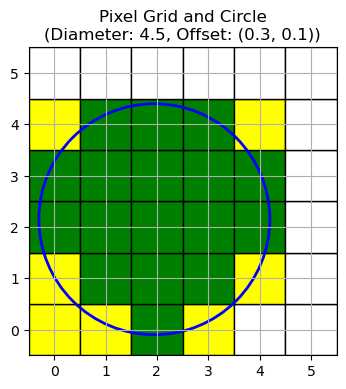

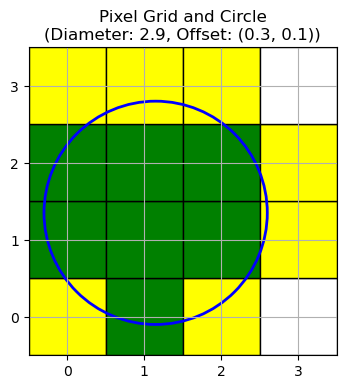

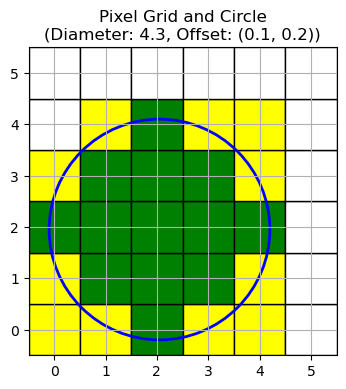

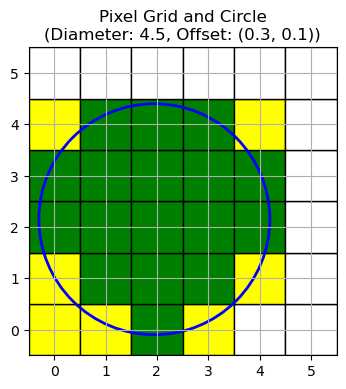

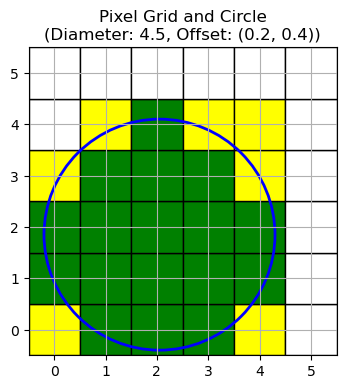

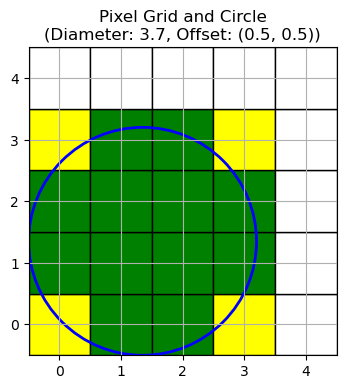

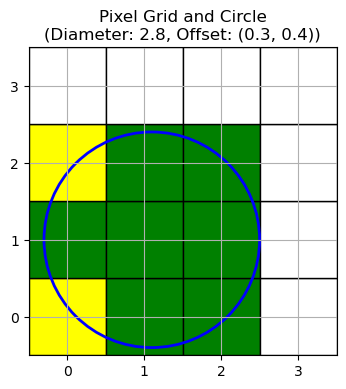

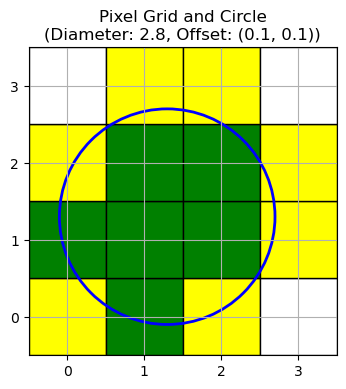

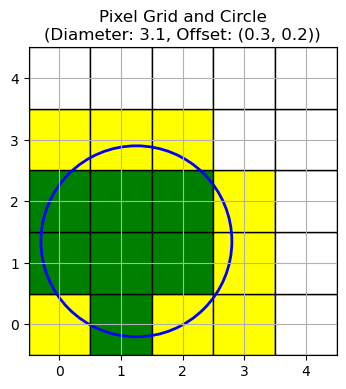

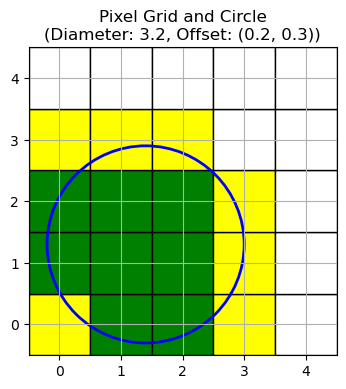

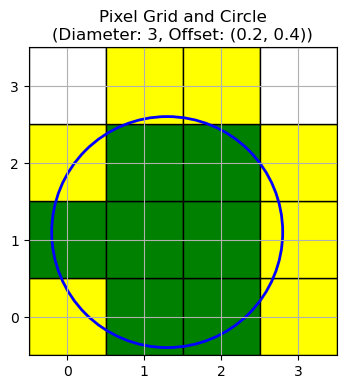

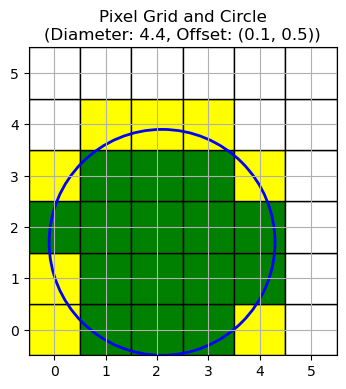

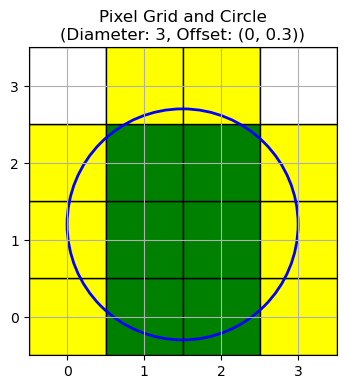

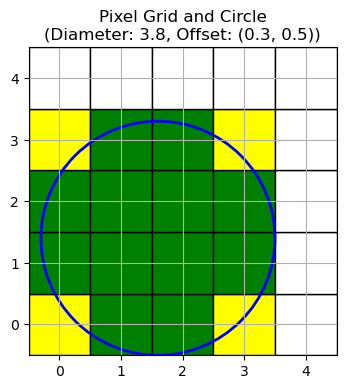

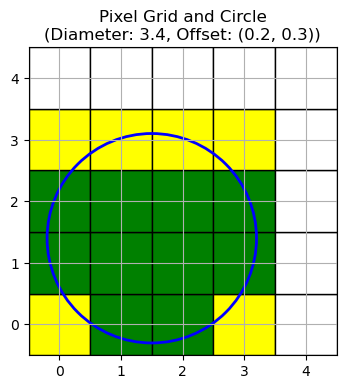

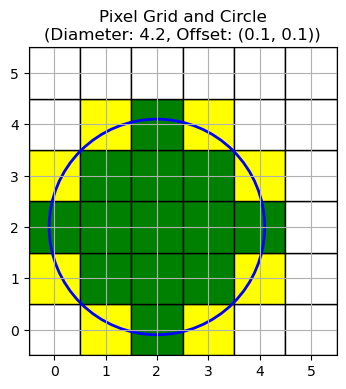

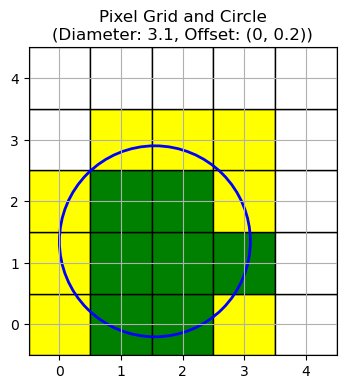

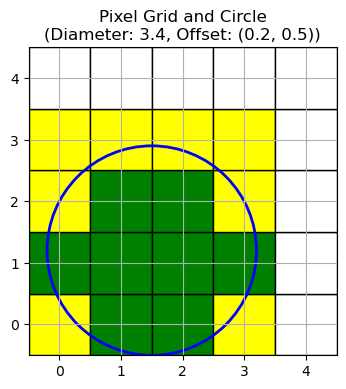

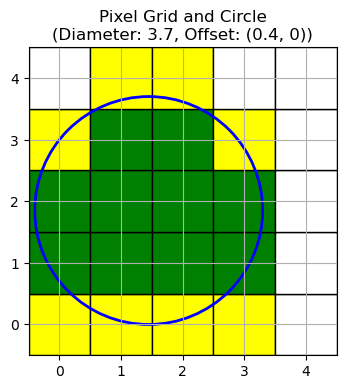

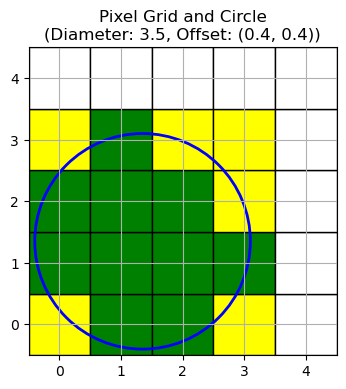

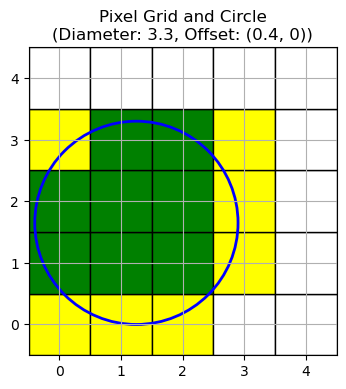

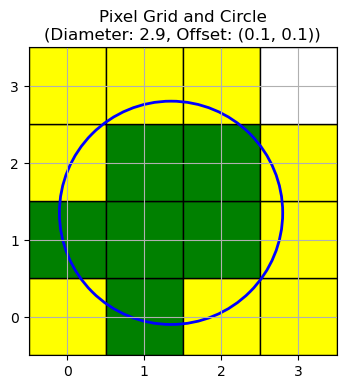

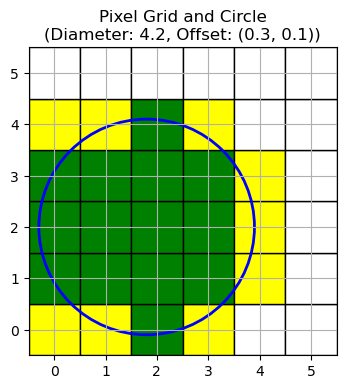

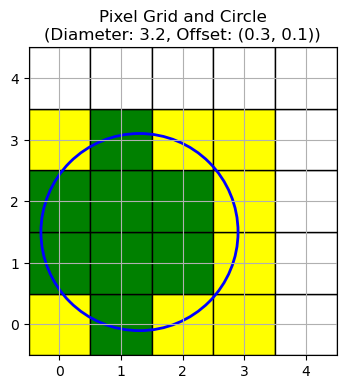

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from shapely.geometry import Point, Polygon

# Function to plot the pixel grid and the corresponding subpixel circle
def plot_pixel_grid_and_circle(diameter, center_x_offset=0.0, center_y_offset=0.0, step=1):
    """Plot the pixel grid and the corresponding circle with subpixel precision."""
    radius = diameter / 2
    grid_size = int(np.ceil(diameter))

    # Adjust grid size based on the offsets to ensure the circle stays within the grid
    x_padding = int(np.ceil(center_x_offset))
    y_padding = int(np.ceil(center_y_offset))
    grid_size += max(x_padding, y_padding)

    fig, ax = plt.subplots(figsize=(4, 4))
    
    # Plot pixels as rectangles
    for i in range(grid_size):
        for j in range(grid_size):
            pixel_corners = [
                (i - 0.5, j - 0.5),
                (i + 0.5, j - 0.5),
                (i + 0.5, j + 0.5),
                (i - 0.5, j + 0.5)
            ]
            pixel_polygon = Polygon(pixel_corners)

            # Define the circle as a shapely object
            circle = Point(radius - center_x_offset, radius - center_y_offset).buffer(radius, resolution=int(diameter * 20))

            # Compute the intersection area between the pixel and the circle
            intersection_area = pixel_polygon.intersection(circle).area

            # Color the pixel based on its intersection area with the circle
            if intersection_area > 0.5:
                color = 'green'  # Pixel captures more than 50% of the circle
            elif intersection_area > 0:
                color = 'yellow'  # Pixel captures part of the circle, but less than 50%
            else:
                color = 'white'  # Pixel does not capture the circle

            # Plot each pixel
            rect = Rectangle((i - 0.5, j - 0.5), 1, 1, facecolor=color, edgecolor='black')
            ax.add_patch(rect)

    # Plot the circle boundary
    circle_patch = Circle((radius - center_x_offset, radius - center_y_offset), radius, fill=False, color='blue', linewidth=2)
    ax.add_patch(circle_patch)

    # Set equal aspect ratio and grid limits
    ax.set_xlim(-0.5, grid_size - 0.5)
    ax.set_ylim(-0.5, grid_size - 0.5)
    ax.set_aspect('equal')

    # Set step size for ticks on both axes
    ax.set_xticks(np.arange(0, grid_size, step))
    ax.set_yticks(np.arange(0, grid_size, step))

    
    ax.set_title(f"Pixel Grid and Circle\n(Diameter: {diameter:.2g}, Offset: ({center_x_offset:.1g}, {center_y_offset:.1g}))")
    plt.grid(True)
    plt.show()

# Generate random diameters and offsets
num_examples = 100  # Number of random examples
step_size = 0.1
random_diameters = np.round(np.random.uniform(2.5, 4.5, num_examples) / step_size) * step_size
random_offsets = np.round(np.random.uniform(0.0, 0.5, (num_examples, 2)) / step_size) * step_size


# Testing the function with random examples
for d, offset in zip(random_diameters, random_offsets):
    plot_pixel_grid_and_circle(d, center_x_offset=offset[0], center_y_offset=offset[1], step=1)

